In [18]:
import pandas as pd

In [19]:
# read the csv file into a pandas dataframe 'eik.csv'
eik = pd.read_csv('../../eik.csv', sep=';', decimal=',')

# use header 'boom' as index
# eik = eik.set_index('Boom')

# remove rows corresponding to the last 3 numbers of my student number: 20215256 -> 256, i=2, j=5, k=6
i, j, k = 2, 5, 6

# remove using the following formulas: k + 1, j + 1, i + 1, jk + 1, ij + 1, ik + 1, ijk + 1 en i + j + k + 1
# one entry is not possible to remove, namely: ijk + 1 = 61, due to index out of bounds
eik = eik.drop([k + 1, j + 1, i + 1, j * k + 1, i * j + 1, i * k + 1, i + j + k + 1])

# Vraag 1 
Bestudeer en bespreek de verdeling van de variabelen Volume en Grootte.<br/>
Bespreek hiertoegepaste grafische voorstellingen.<br/>
Ga ook op een formele manier na of de gegevens normaal verdeeld zijn.<br/> 
Indien dit niet het geval is, in welke zin wijken de gegevens af van normaal verdeelde gegevens?<br/> Bespreek ?<br/>

FileNotFoundError: [Errno 2] No such file or directory: 'images/vraag1/hist_norm.png'

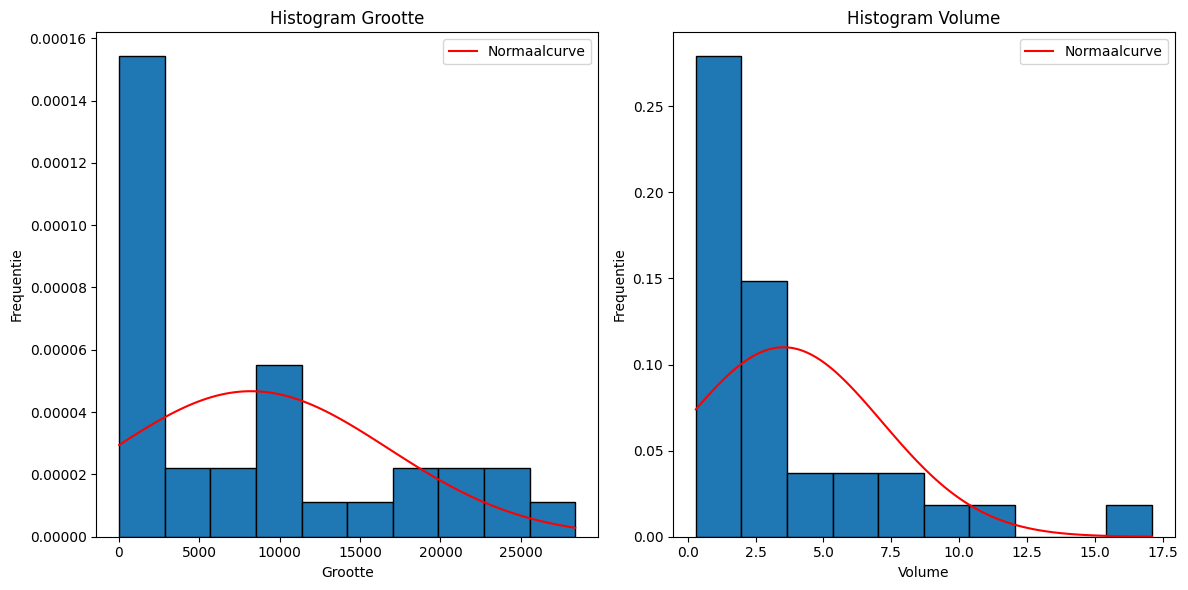

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram for 'Grootte'
plt.subplot(1, 2, 1)
hist_counts, hist_bins, _ = plt.hist(eik['Grootte'], edgecolor='black', density=True)
plt.xlabel('Grootte')
plt.ylabel('Frequentie')
plt.title('Histogram Grootte')

# Calculate mean and standard deviation 
mean_grootte = eik['Grootte'].mean()
std_grootte = eik['Grootte'].std()

# Calculate probability density function (PDF)
x_grootte = np.linspace(eik['Grootte'].min(), eik['Grootte'].max(), 100)
pdf_grootte = stats.norm.pdf(x_grootte, mean_grootte, std_grootte)

# Scale the PDF to align with the histogram
scale_grootte = sum(hist_counts * np.diff(hist_bins)) # Sum of histogram bin heights * bin width
plt.plot(x_grootte, pdf_grootte / scale_grootte, 'r-', label='Normaalcurve')

plt.legend()

# Plot histogram for 'Volume'
plt.subplot(1, 2, 2)
hist_counts, hist_bins, _ = plt.hist(eik['Volume'], edgecolor='black', density=True)
plt.xlabel('Volume')
plt.ylabel('Frequentie')
plt.title('Histogram Volume')

# Calculate mean and standard deviation manually
mean_volume = eik['Volume'].mean()
std_volume = eik['Volume'].std()

# Calculate probability density function (PDF)
x_volume = np.linspace(eik['Volume'].min(), eik['Volume'].max(), 100)
pdf_volume = stats.norm.pdf(x_volume, mean_volume, std_volume)

# Scale the PDF to align with the histogram
scale_volume = sum(hist_counts * np.diff(hist_bins)) # Sum of histogram bin heights * bin width
plt.plot(x_volume, pdf_volume / scale_volume, 'r-', label='Normaalcurve')

plt.legend()

plt.tight_layout()
plt.savefig('images/vraag1/hist_norm.png')

plt.show()


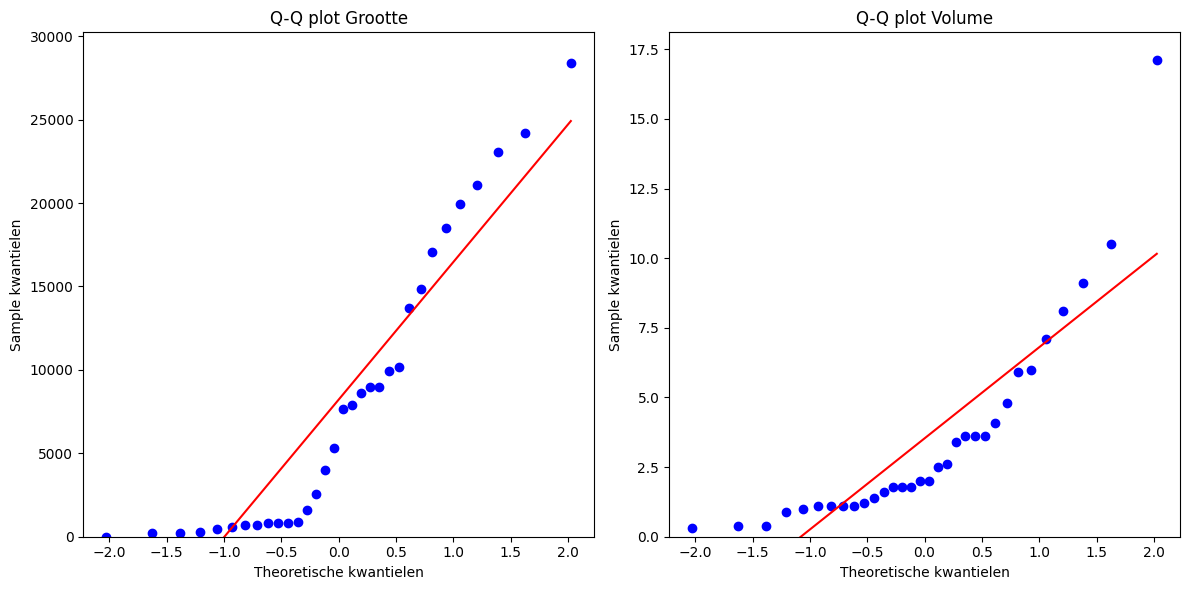

In [ ]:
# Q-Q plot for both 'Grootte' and 'Volume'
plt.figure(figsize=(12, 6))

# Q-Q plot for 'Grootte'
plt.subplot(1, 2, 1)
stats.probplot(eik['Grootte'], dist='norm', plot=plt)
plt.ylim(0)
plt.xlabel('Theoretische kwantielen')
plt.ylabel('Sample kwantielen')
plt.title('Q-Q plot Grootte')

# Q-Q plot for 'Volume'
plt.subplot(1, 2, 2)
stats.probplot(eik['Volume'], dist='norm', plot=plt)
plt.ylim(0)
plt.ylabel('Sample kwantielen')
plt.xlabel('Theoretische kwantielen')
plt.title('Q-Q plot Volume')

plt.tight_layout()
plt.savefig('images/vraag1/qqplot.png')

plt.show()

In [21]:
# Calculate skewness and kurtosis for both 'Grootte' and 'Volume'
skewness_grootte = eik['Grootte'].skew()
kurtosis_grootte = eik['Grootte'].kurtosis()
skewness_volume = eik['Volume'].skew()
kurtosis_volume = eik['Volume'].kurtosis()

# if skewness is between -0.5 and 0.5, the distribution is approximately symmetric
# if skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed
# if skewness is less than -1 or greater than 1, the distribution is highly skewed
# if skewness is 0, the distribution is perfectly symmetric
result_skew_grootte = 'approximately symmetric' if -0.5 < skewness_grootte < 0.5 else 'moderately skewed' if -1 < skewness_grootte < -0.5 or 0.5 < skewness_grootte < 1 else 'highly skewed' if skewness_grootte < -1 or skewness_grootte > 1 else 'perfectly symmetric'
result_skew_volume = 'approximately symmetric' if -0.5 < skewness_volume < 0.5 else 'moderately skewed' if -1 < skewness_volume < -0.5 or 0.5 < skewness_volume < 1 else 'highly skewed' if skewness_volume < -1 or skewness_volume > 1 else 'perfectly symmetric'

# if kurtosis is between -1 and 1, the distribution is mesokurtic, which means that the distribution has a normal shape
# if kurtosis is less than -1, the distribution is platykurtic, which means that the distribution is flatter than a normal distribution
# if kurtosis is greater than 1, the distribution is leptokurtic, which means that the distribution is more peaked than a normal distribution
result_kurt_grootte = 'mesokurtic' if -1 < kurtosis_grootte < 1 else 'platykurtic' if kurtosis_grootte < -1 else 'leptokurtic' if kurtosis_grootte > 1 else 'mesokurtic'
result_kurt_volume = 'mesokurtic' if -1 < kurtosis_volume < 1 else 'platykurtic' if kurtosis_volume < -1 else 'leptokurtic' if kurtosis_volume > 1 else 'mesokurtic'

# Print results
print('Skewness Grootte: ' + str(skewness_grootte) + ' (' + result_skew_grootte + ')')
print('Kurtosis Grootte: ' + str(kurtosis_grootte) + ' (' + result_kurt_grootte + ')')
print('Skewness Volume: ' + str(skewness_volume) + ' (' + result_skew_volume + ')')
print('Kurtosis Volume: ' + str(kurtosis_volume) + ' (' + result_kurt_volume + ')')



Skewness Grootte: 0.8563120446782003 (moderately skewed)
Kurtosis Grootte: -0.43809382386515594 (mesokurtic)
Skewness Volume: 2.12364122574432 (highly skewed)
Kurtosis Volume: 5.422885884322245 (leptokurtic)


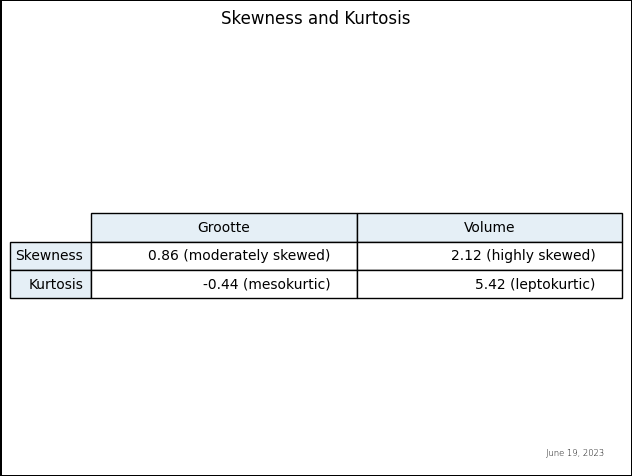

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

title_text = 'Skewness and Kurtosis'
footer_text = 'June 19, 2023'
fig_border = 'black'
fig_background_color = 'white'

data =  [
    [         'Grootte', 'Volume'],
    ['Skewness',  f"{round(skewness_grootte, 2)} ({result_skew_grootte})", f"{round(skewness_volume, 2)} ({result_skew_volume})"],
    ['Kurtosis',  f"{round(kurtosis_grootte, 2)} ({result_kurt_grootte})", f"{round(kurtosis_volume,2)} ({result_kurt_volume})"],
]

# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]

# Table data needs to be non-numeric text. Format the data while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:1.4f}' if isinstance(x, (int, float)) else x for x in row])

# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

# Create the figure. Setting a small pad on tight_layout seems to better regulate white space.
plt.figure(linewidth=2, edgecolor=fig_border, facecolor=fig_background_color, tight_layout={'pad': 1})

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')

# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide axes border
plt.box(on=None)

# Add title
plt.suptitle(title_text)

# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')

# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()

# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('images/vraag1/skew_kurt.png',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )


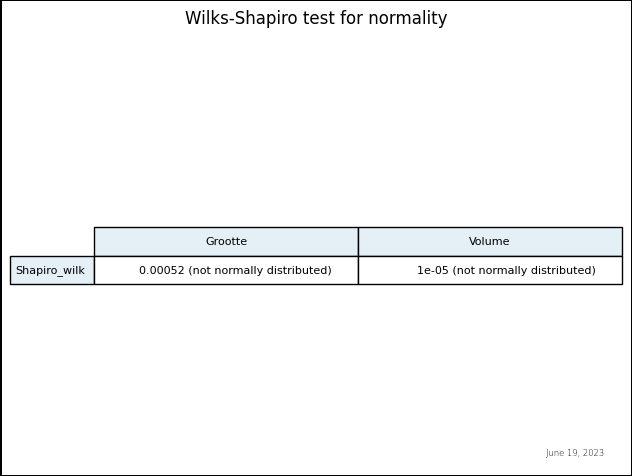

In [ ]:
# Wilks-Shapiro test for normality
from scipy.stats import shapiro

# Perform the Wilks-Shapiro test for normality on 'Grootte'
stat, p_grootte = shapiro(eik['Grootte'])
alpha = 0.05 # significance level 
result_grootte = 'normally distributed' if p_grootte > alpha else 'not normally distributed'

# Perform the Wilks-Shapiro test for normality on 'Volume'
stat, p_volume = shapiro(eik['Volume'])
alpha = 0.05 # significance level
result_volume = 'normally distributed' if p_volume > alpha else 'not normally distributed'

# Create image
import matplotlib.pyplot as plt
import numpy as np

title_text = 'Wilks-Shapiro test for normality'
footer_text = 'June 19, 2023'
fig_border = 'black'
fig_background_color = 'white'

data =  [
    [         'Grootte', 'Volume'],
    ['Shapiro_wilk',  f"{round(p_grootte, 5)} ({result_grootte})", f"{round(p_volume, 5)} ({result_volume})"],
]

# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]

# Table data needs to be non-numeric text. Format the data while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:1.4f}' if isinstance(x, (int, float)) else x for x in row])

# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

# Create the figure. Setting a small pad on tight_layout seems to better regulate white space.
plt.figure(linewidth=2, edgecolor=fig_border, facecolor=fig_background_color, tight_layout={'pad': 1})

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                        rowLabels=row_headers,
                        rowColours=rcolors,
                        rowLoc='right',
                        colColours=ccolors,
                        colLabels=column_headers,
                        loc='center')

# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide axes border
plt.box(on=None)

# Add title
plt.suptitle(title_text)

# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')

# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()

# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('images/vraag1/shapiro_wilk.png',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )

Skewness Grootte: -0.13837936539510617
Kurtosis Grootte: -1.3294488533295603
Shapiro-Wilk Grootte: 0.03551756590604782
Skewness Volume: -0.054322078403517174
Kurtosis Volume: -0.3034985820904663
Shapiro-Wilk Volume: 0.8196450471878052


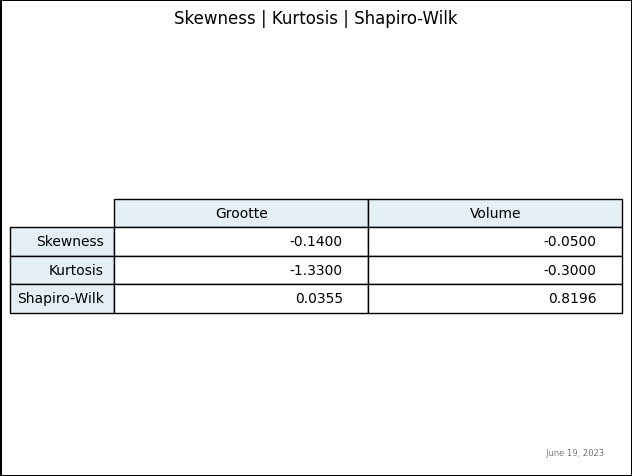

In [ ]:
from scipy.stats import shapiro

# transform 'Grootte' by taking the fourth root
eik['Transformed_Grootte'] = eik['Grootte'].apply(lambda x: x ** (1/4))

# transform 'Volume' by taking the logarithm
eik['Transformed_Volume'] = eik['Volume'].apply(lambda x: np.log(x))

# Perform the skewness, kurtosis and Shapiro-Wilk test for normality on 'Grootte'
stat, p_grootte = shapiro(eik['Transformed_Grootte'])
skew_grootte = eik['Transformed_Grootte'].skew()
kurt_grootte = eik['Transformed_Grootte'].kurtosis()

# Perform the skewness, kurtosis and Shapiro-Wilk test for normality on 'Volume'
stat, p_volume = shapiro(eik['Transformed_Volume'])
skew_volume = eik['Transformed_Volume'].skew()
kurt_volume = eik['Transformed_Volume'].kurtosis()

print(f"Skewness Grootte: {skew_grootte}")
print(f"Kurtosis Grootte: {kurt_grootte}")
print(f"Shapiro-Wilk Grootte: {p_grootte}")

print(f"Skewness Volume: {skew_volume}")
print(f"Kurtosis Volume: {kurt_volume}")
print(f"Shapiro-Wilk Volume: {p_volume}")



title_text = 'Skewness | Kurtosis | Shapiro-Wilk'
footer_text = 'June 19, 2023'
fig_border = 'black'
fig_background_color = 'white'

data =  [
    [         'Grootte', 'Volume'],
    ['Skewness',  round(skew_grootte, 2), round(skew_volume, 2)],
    ['Kurtosis',  round(kurt_grootte, 2), round(kurt_volume,2)],
    ['Shapiro-Wilk', round(p_grootte, 5), round(p_volume, 5)],
]

# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]

# Table data needs to be non-numeric text. Format the data while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:1.4f}' if isinstance(x, (int, float)) else x for x in row])

# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

# Create the figure. Setting a small pad on tight_layout seems to better regulate white space.
plt.figure(linewidth=2, edgecolor=fig_border, facecolor=fig_background_color, tight_layout={'pad': 1})

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                        rowLabels=row_headers,
                        rowColours=rcolors,
                        rowLoc='right',
                        colColours=ccolors,
                        colLabels=column_headers,
                        loc='center')

# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide axes border
plt.box(on=None)

# Add title
plt.suptitle(title_text)

# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')

# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()

# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('images/vraag1/skew_kurt_shapiro.png',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )

